In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [30]:
import pandas as pd
import numpy as np

In [14]:
data= pd.read_csv('/content/drive/MyDrive/DM/data01.csv')

In [15]:
data.head()

,strain,tempreture,strain_rate,flow_stress
0,0.000000,-40,0.3,0.00000
1,0.003390,-40,0.3,1.96078
2,0.006780,-40,0.3,4.90196
3,0.010169,-40,0.3,8.82353
4,0.013559,-40,0.3,12.74510


In [22]:
y = data.iloc[: , -1]
x = data.iloc[: , 0:3]

In [33]:
y = y.reshape(-1,1)

In [34]:
from sklearn.preprocessing import MinMaxScaler 
scaler = MinMaxScaler()
y = scaler.fit_transform(y)
x = scaler.fit_transform(x)

In [36]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    x, y, test_size=0.33, random_state=42)

In [49]:
from keras.layers import Dense, Activation
from keras.models import Sequential
from keras import regularizers
from keras.layers import Dropout
model = Sequential()
model.add(Dense(64, activation = 'relu'  ,  kernel_regularizer=regularizers.L1(0.01)))
model.add(Dropout(0.25))
model.add(Dense(units = 32 , activation = 'relu' ,  kernel_regularizer=regularizers.L1(0.01)) )
model.add(Dropout(0.25))
model.add(Dense(units = 8, activation = 'relu'  , kernel_regularizer=regularizers.L1(0.01)))
model.add(Dense(units = 4, activation = 'relu'  , kernel_regularizer=regularizers.L1(0.01)))
model.add(Dense(units = 1 , activation = 'linear'))

In [50]:
import math
def scheduler(epoch, lr):
  lr = 0.01
  if epoch < 50 and epoch> 10 :
    return lr / (epoch)+1 
  else:
    return lr * math.exp(-0.1) / epoch

In [51]:
from tensorflow.keras import optimizers
from tensorflow import keras 
opt = optimizers.Adam()
model.compile(loss = 'mean_squared_error' , optimizer=opt)
#callback = keras.callbacks.LearningRateScheduler(scheduler)

In [52]:
history = model.fit(X_train, y_train, batch_size = 2000, validation_data=(X_test , y_test) , epochs = 150 , verbose=2 , 
                #   callbacks=[callback]
                    )

Epoch 1/150
40/40 - 3s - loss: 3.2097 - val_loss: 2.7068 - 3s/epoch - 77ms/step
Epoch 2/150
40/40 - 0s - loss: 2.2571 - val_loss: 1.8342 - 200ms/epoch - 5ms/step
Epoch 3/150
40/40 - 0s - loss: 1.5046 - val_loss: 1.1869 - 178ms/epoch - 4ms/step
Epoch 4/150
40/40 - 0s - loss: 0.9419 - val_loss: 0.7087 - 167ms/epoch - 4ms/step
Epoch 5/150
40/40 - 0s - loss: 0.5374 - val_loss: 0.3808 - 193ms/epoch - 5ms/step
Epoch 6/150
40/40 - 0s - loss: 0.2861 - val_loss: 0.2099 - 193ms/epoch - 5ms/step
Epoch 7/150
40/40 - 0s - loss: 0.1750 - val_loss: 0.1456 - 201ms/epoch - 5ms/step
Epoch 8/150
40/40 - 0s - loss: 0.1276 - val_loss: 0.1105 - 172ms/epoch - 4ms/step
Epoch 9/150
40/40 - 0s - loss: 0.1001 - val_loss: 0.0901 - 161ms/epoch - 4ms/step
Epoch 10/150
40/40 - 0s - loss: 0.0854 - val_loss: 0.0808 - 190ms/epoch - 5ms/step
Epoch 11/150
40/40 - 0s - loss: 0.0788 - val_loss: 0.0760 - 167ms/epoch - 4ms/step
Epoch 12/150
40/40 - 0s - loss: 0.0745 - val_loss: 0.0721 - 161ms/epoch - 4ms/step
Epoch 13/150
40

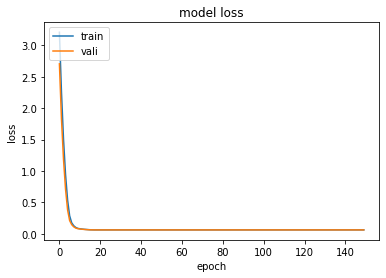

In [54]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'vali'], loc='upper left')
#plt.savefig('/content/drive/MyDrive/DM/fitted.png' , dpi=300)
plt.show()

In [ ]:
model.save('MV2MSE250.h5') 

In [ ]:
from keras.models import load_model
model = load_model('MV1.h5')

In [55]:
from sklearn.tree import DecisionTreeRegressor
regressor = DecisionTreeRegressor(random_state=0 , max_depth =100 , 
                                  splitter ='random'
 )
regressor.fit(X_train , y_train)

DecisionTreeRegressor(max_depth=100, random_state=0, splitter='random')

In [56]:
y_pred = regressor.predict(X_test)

In [57]:
from sklearn.metrics import mean_absolute_error
errors = mean_absolute_error(y_test, y_pred)

In [58]:
print(errors)

0.00014889970710457072


In [60]:
from sklearn.metrics import mean_squared_error
error = mean_squared_error(y_test, y_pred , squared = False)
print(error)

0.0013493240920861137


In [61]:
print(y_pred)

[0.6348904  0.71489146 0.19212832 ... 0.69455458 0.14760678 0.50062836]


In [62]:
print(y_test)

[[0.63487141]
 [0.71489556]
 [0.19234723]
 ...
 [0.69447877]
 [0.14759796]
 [0.50045407]]
